In [1]:
#Subimos tu API key de Kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"wilberbarc","key":"10f88b754f4b38b10b72dabe8c8d8b52"}'}

In [2]:
#instalamos kaggle y autenticamos para poder decargar
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
# Descargamos el dataset de Kaggle
!kaggle datasets download -d mczielinski/bitcoin-historical-data
# Descomprimir el archivo
!unzip bitcoin-historical-data.zip

 98% 98.0M/100M [00:04<00:00, 27.4MB/s]
100% 100M/100M [00:04<00:00, 23.3MB/s] 
Archive:  bitcoin-historical-data.zip
  inflating: bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv  


In [4]:
import pandas as pd

# cargar el dataset de Bitcoin Historical Data
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')

In [5]:
#mostramos 10 datos aleatorios
df.sample(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4501024,1595767680,9899.56,9902.05,9891.94,9893.54,10.756746,106480.419880,9898.943305
3112540,1512458640,11541.84,11541.86,11530.82,11530.92,4.123848,47553.936888,11531.447767
4089815,1571095140,8338.28,8338.28,8338.28,8338.28,0.044207,368.607175,8338.280000
2776415,1492291140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014590,1446581640,388.02,388.85,386.68,388.70,43.089255,16691.148491,387.362196
3234533,1519778220,10654.19,10660.00,10654.19,10660.00,0.131947,1405.823035,10654.421748
2007891,1446179700,331.37,331.68,330.53,331.37,6.350151,2099.684149,330.651056
1968027,1443787860,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1587731,1420970100,276.62,276.63,276.62,276.63,1.001362,277.002800,276.626007
4339991,1586105700,6781.72,6781.72,6774.42,6774.42,0.704702,4774.779934,6775.597373


In [6]:
# convertir la columna 'Timestamp' a tipo datetime fecha y hora normal
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

# establecer la columna 'Timestamp' como índice del dataframe
df.set_index('Timestamp', inplace=True)

# realizar la interpolación de los datos faltantes en la columna 'Close'
df['Close'] = df['Close'].interpolate()


# Elimina los valores NaN de la columna 'Close'
#df.dropna(subset=['Close'], inplace=True)

# guardar el dataframe actualizado en un nuevo archivo csv
df.to_csv('bitcoin_historical_data_interpolated.csv')

In [7]:
# cargar el archivo csv con los datos interpolados
df = pd.read_csv('bitcoin_historical_data_interpolated.csv')

In [8]:
df.head(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 07:53:00,NaN,NaN,NaN,4.39,NaN,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN,NaN,4.39,NaN,NaN,NaN
3,2011-12-31 07:55:00,NaN,NaN,NaN,4.39,NaN,NaN,NaN
4,2011-12-31 07:56:00,NaN,NaN,NaN,4.39,NaN,NaN,NaN
5,2011-12-31 07:57:00,NaN,NaN,NaN,4.39,NaN,NaN,NaN
6,2011-12-31 07:58:00,NaN,NaN,NaN,4.39,NaN,NaN,NaN
7,2011-12-31 07:59:00,NaN,NaN,NaN,4.39,NaN,NaN,NaN
8,2011-12-31 08:00:00,NaN,NaN,NaN,4.39,NaN,NaN,NaN
9,2011-12-31 08:01:00,NaN,NaN,NaN,4.39,NaN,NaN,NaN


In [9]:
# creamos una variable y solo introducimos los datos de las columnas Timestamp y Close
new_df = df.loc[:, ['Timestamp', 'Close']]
new_df.head(10)

,Timestamp,Close
0,2011-12-31 07:52:00,4.39
1,2011-12-31 07:53:00,4.39
2,2011-12-31 07:54:00,4.39
3,2011-12-31 07:55:00,4.39
4,2011-12-31 07:56:00,4.39
5,2011-12-31 07:57:00,4.39
6,2011-12-31 07:58:00,4.39
7,2011-12-31 07:59:00,4.39
8,2011-12-31 08:00:00,4.39
9,2011-12-31 08:01:00,4.39


In [16]:
import numpy as np

# definir el número de pasos para la serie de tiempo
n_steps = 50


# Agregar una nueva columna llamada 'Seno' con la función seno de la columna 'Close'
new_df['Seno'] = np.sin(new_df['Close'])

# crear la serie de tiempo a partir de los datos de 'Close'
#series = np.array(df['Close'])

# crear la serie de tiempo a partir de los datos de 'Close'
series = np.array(new_df['Seno']) # Usar la columna 'Seno' en lugar de la columna 'Close'

# dividir los datos en entrenamiento, validación y prueba
train_size = int(len(series) * 0.7)
valid_size = int(len(series) * 0.2)
test_size = len(series) - train_size - valid_size

X_train, y_train = [], []
for i in range(train_size - n_steps):
    X_train.append(series[i:i+n_steps])
    y_train.append(series[i+n_steps])
X_train, y_train = np.array(X_train), np.array(y_train)

X_valid, y_valid = [], []
for i in range(train_size, train_size+valid_size-n_steps):
    X_valid.append(series[i:i+n_steps])
    y_valid.append(series[i+n_steps])
X_valid, y_valid = np.array(X_valid), np.array(y_valid)

X_test, y_test = [], []
for i in range(train_size+valid_size, len(series)-n_steps):
    X_test.append(series[i:i+n_steps])
    y_test.append(series[i+n_steps])
X_test, y_test = np.array(X_test), np.array(y_test)

# verificar las dimensiones de los datos
#print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape)
X_train.shape, y_train.shape

((3400113, 50), (3400113,))

In [17]:
new_df.head(10)

,Timestamp,Close,Seno
0,2011-12-31 07:52:00,4.39,-0.948481
1,2011-12-31 07:53:00,4.39,-0.948481
2,2011-12-31 07:54:00,4.39,-0.948481
3,2011-12-31 07:55:00,4.39,-0.948481
4,2011-12-31 07:56:00,4.39,-0.948481
5,2011-12-31 07:57:00,4.39,-0.948481
6,2011-12-31 07:58:00,4.39,-0.948481
7,2011-12-31 07:59:00,4.39,-0.948481
8,2011-12-31 08:00:00,4.39,-0.948481
9,2011-12-31 08:01:00,4.39,-0.948481


In [18]:
X_valid.shape, y_valid.shape

((971425, 50), (971425,))

In [19]:
# X_test = X_test.reshape(-1, n_steps, 1)
# añadimos una dimension mas a cada variable
X_train = X_train[..., np.newaxis]
y_train = y_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
y_valid = y_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]
y_test = y_test[..., np.newaxis]

In [20]:
X_train.shape, y_train.shape

((3400113, 50, 1), (3400113, 1))

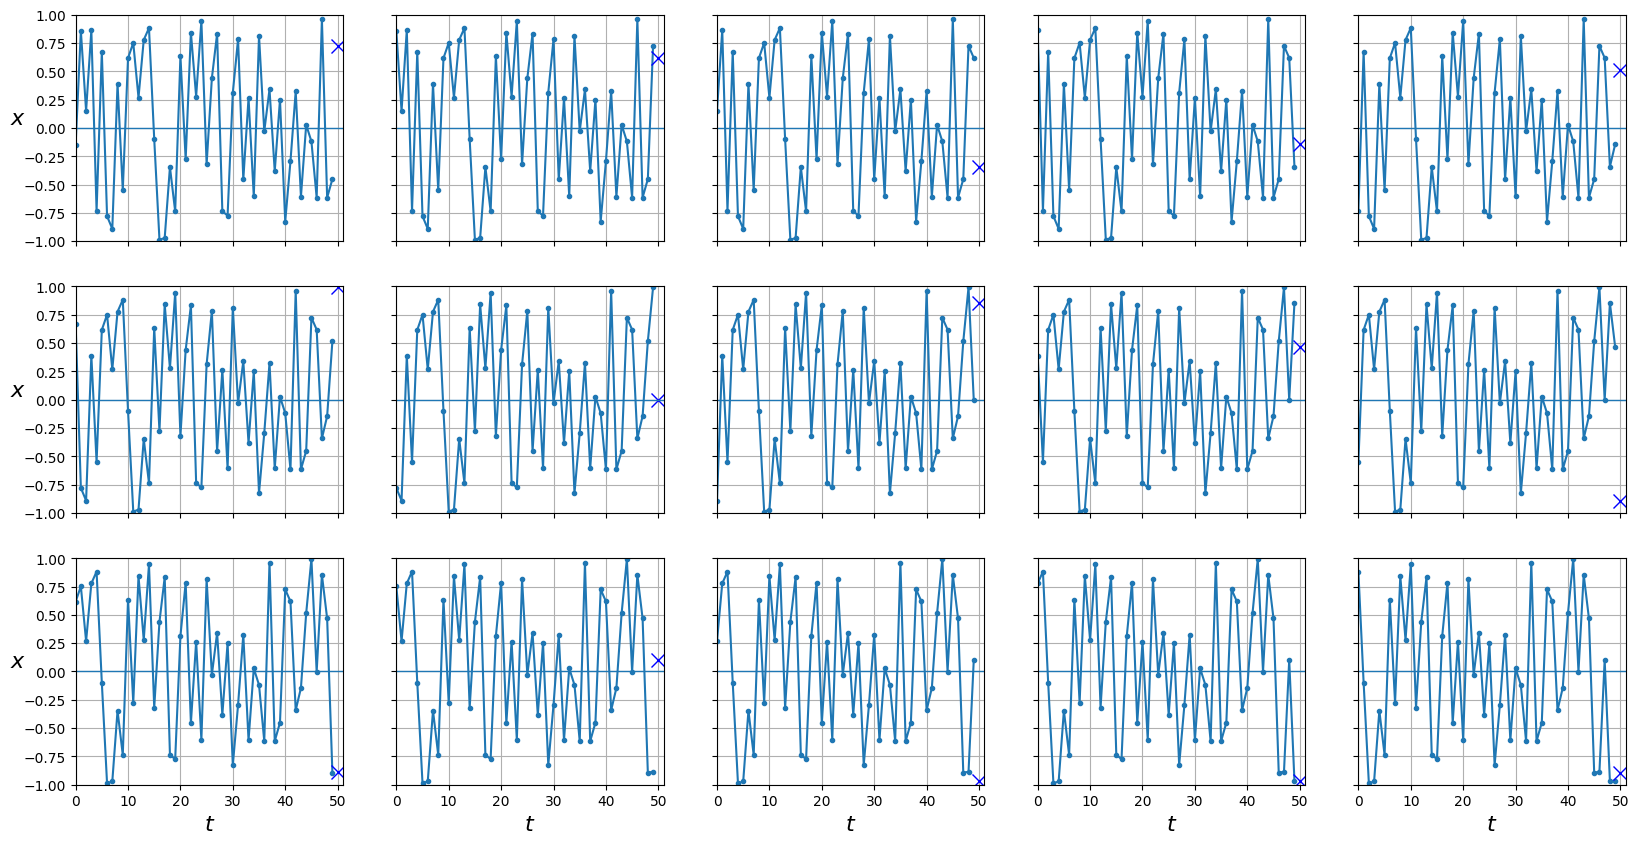

In [21]:
import matplotlib.pyplot as plt

def plot_series(series, y=None, y_pred=None, y_pred_std=None, x_label="$t$", y_label="$x$"):
  r, c = 3, 5
  fig, axes = plt.subplots(nrows=r, ncols=c, sharey=True, sharex=True, figsize=(20, 10))
  for row in range(r):
    for col in range(c):
        plt.sca(axes[row][col])
        ix = col + row*c
        plt.plot(series[ix, :], ".-")
        if y is not None:
            plt.plot(range(len(series[ix, :]), len(series[ix, :])+len(y[ix])), y[ix], "bx", markersize=10)
        if y_pred is not None:
            plt.plot(range(len(series[ix, :]), len(series[ix, :])+len(y_pred[ix])), y_pred[ix], "ro")
        if y_pred_std is not None:
            plt.plot(range(len(series[ix, :]), len(series[ix, :])+len(y_pred[ix])), y_pred[ix] + y_pred_std[ix])
            plt.plot(range(len(series[ix, :]), len(series[ix, :])+len(y_pred[ix])), y_pred[ix] - y_pred_std[ix])
        plt.grid(True)
        plt.hlines(0, 0, 100, linewidth=1)
        plt.axis([0, len(series[ix, :])+len(y[ix]), -1, 1])
        if x_label and row == r - 1:
          plt.xlabel(x_label, fontsize=16)
        if y_label and col == 0:
          plt.ylabel(y_label, fontsize=16, rotation=0)
  plt.show()

plot_series(X_test, y_test)

In [26]:
import torch
from torch.utils.data import Dataset, DataLoader



class TimeSeriesDataset(Dataset):
  def __init__(self, X, y=None, train=True):
    self.X = X
    self.y = y
    self.train = train

  def __len__(self):
    return len(self.X)

  def __getitem__(self, ix):
    if self.train:
        if isinstance(self.X[ix], torch.Tensor):
            X = self.X[ix].to(dtype=torch.float32)
        else:
            X = torch.from_numpy(self.X[ix].astype(np.float32))
        if isinstance(self.y[ix], torch.Tensor):
            y = self.y[ix].to(dtype=torch.float32)
        else:
            y = torch.from_numpy(self.y[ix].astype(np.float32))
        return X, y
    else:
        if isinstance(self.X[ix], torch.Tensor):
            X = self.X[ix].to(dtype=torch.float32)
        else:
            X = torch.from_numpy(self.X[ix].astype(np.float32))
        return X



dataset = {
    'train': TimeSeriesDataset(X_train, y_train),
    'eval': TimeSeriesDataset(X_valid, y_valid),
    'test': TimeSeriesDataset(X_test, y_test, train=False)
}

dataloader = {
    'train': DataLoader(dataset['train'], shuffle=True, batch_size=64),
    'eval': DataLoader(dataset['eval'], shuffle=False, batch_size=64),
    'test': DataLoader(dataset['test'], shuffle=False, batch_size=64)
}

In [27]:
class RNN(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.rnn = torch.nn.RNN(input_size=1, hidden_size=20, num_layers=1, batch_first=True)
    self.fc = torch.nn.Linear(20, 1)

  def forward(self, x):
    x, h = self.rnn(x)
    y = self.fc(x[:,-1])
    return y

rnn = RNN()

In [28]:
from tqdm import tqdm
device = "cuda" if torch.cuda.is_available() else "cpu"

def fit(model, dataloader, epochs=10):
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    criterion = torch.nn.MSELoss()
    bar = tqdm(range(1, epochs+1))
    for epoch in bar:
        model.train()
        train_loss = []
        for batch in dataloader['train']:
            X, y = batch
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
        model.eval()
        eval_loss = []
        with torch.no_grad():
            for batch in dataloader['eval']:
                X, y = batch
                X, y = X.to(device), y.to(device)
                y_hat = model(X)
                loss = criterion(y_hat, y)
                eval_loss.append(loss.item())
        bar.set_description(f"loss {np.mean(train_loss):.5f} val_loss {np.mean(eval_loss):.5f}")

def predict(model, dataloader):
    model.eval()
    with torch.no_grad():
        preds = torch.tensor([]).to(device)
        for batch in dataloader:
            X = batch
            X = X.to(device)
            pred = model(X)
            preds = torch.cat([preds, pred])
        return preds

In [29]:
fit(rnn, dataloader)

loss 0.17101 val_loss 0.53193: 100%|██████████| 10/10 [24:34<00:00, 147.47s/it]


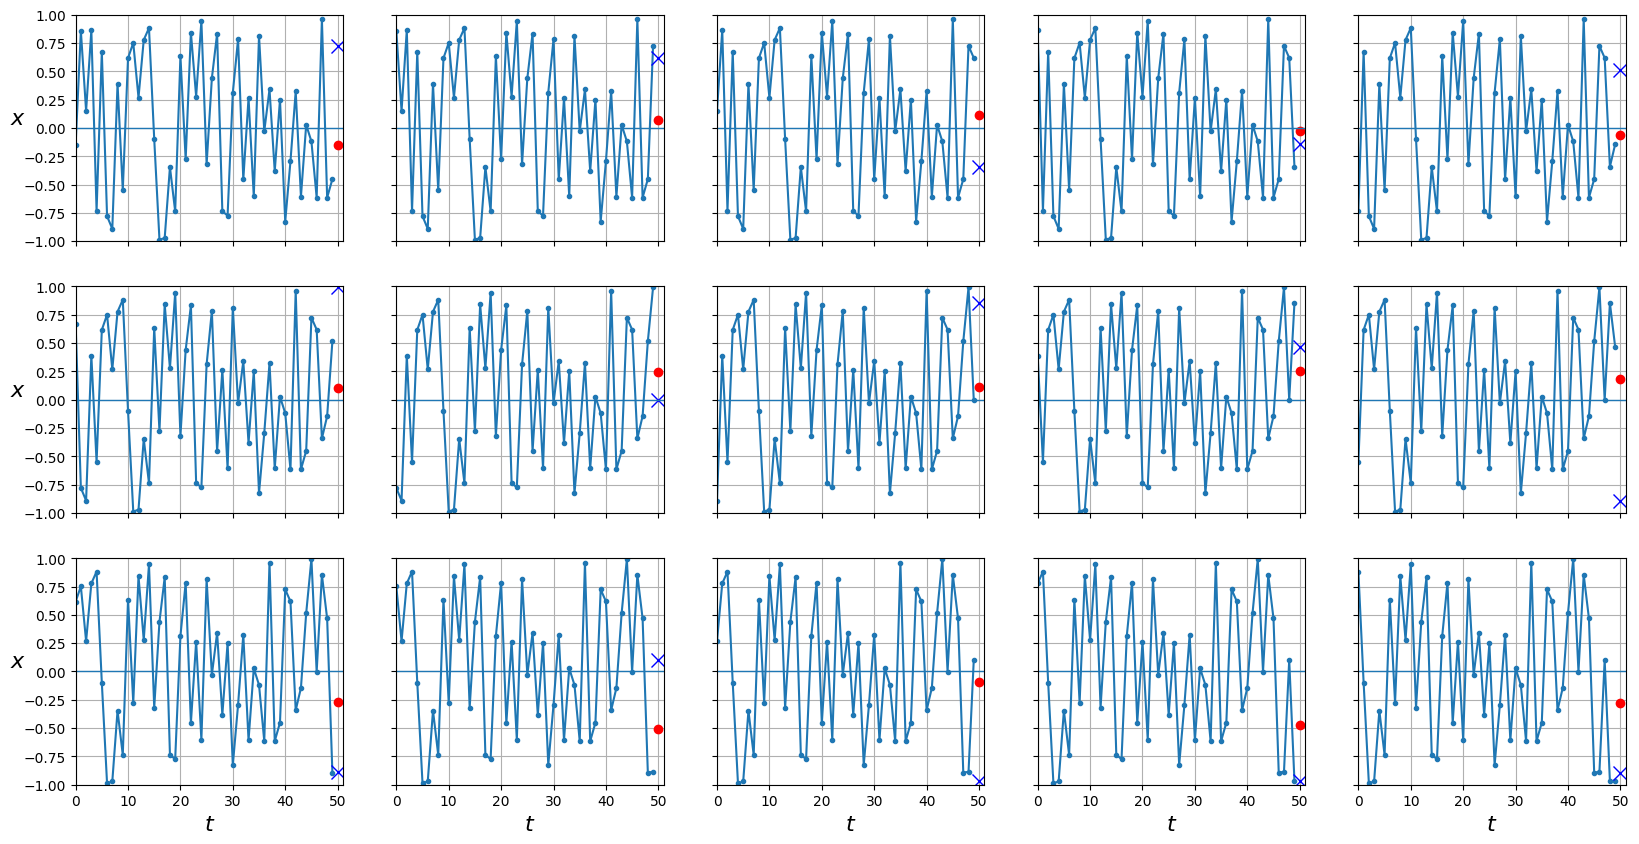

0.5717834378130633

In [30]:
from sklearn.metrics import mean_squared_error

y_pred = predict(rnn, dataloader['test'])
plot_series(X_test, y_test, y_pred.cpu().numpy())
mean_squared_error(y_test, y_pred.cpu())

In [31]:
class DeepRNN(torch.nn.Module):
  def __init__(self, n_in=50, n_out=1):
    super().__init__()
    self.rnn = torch.nn.RNN(input_size=1, hidden_size=20, num_layers=2, batch_first=True)
    self.fc = torch.nn.Linear(20, 1)

  def forward(self, x):
    x, h = self.rnn(x)
    x = self.fc(x[:,-1])
    return x

In [32]:
rnn = DeepRNN()
fit(rnn, dataloader)

loss 0.17420 val_loss 0.50567: 100%|██████████| 10/10 [26:13<00:00, 157.34s/it]


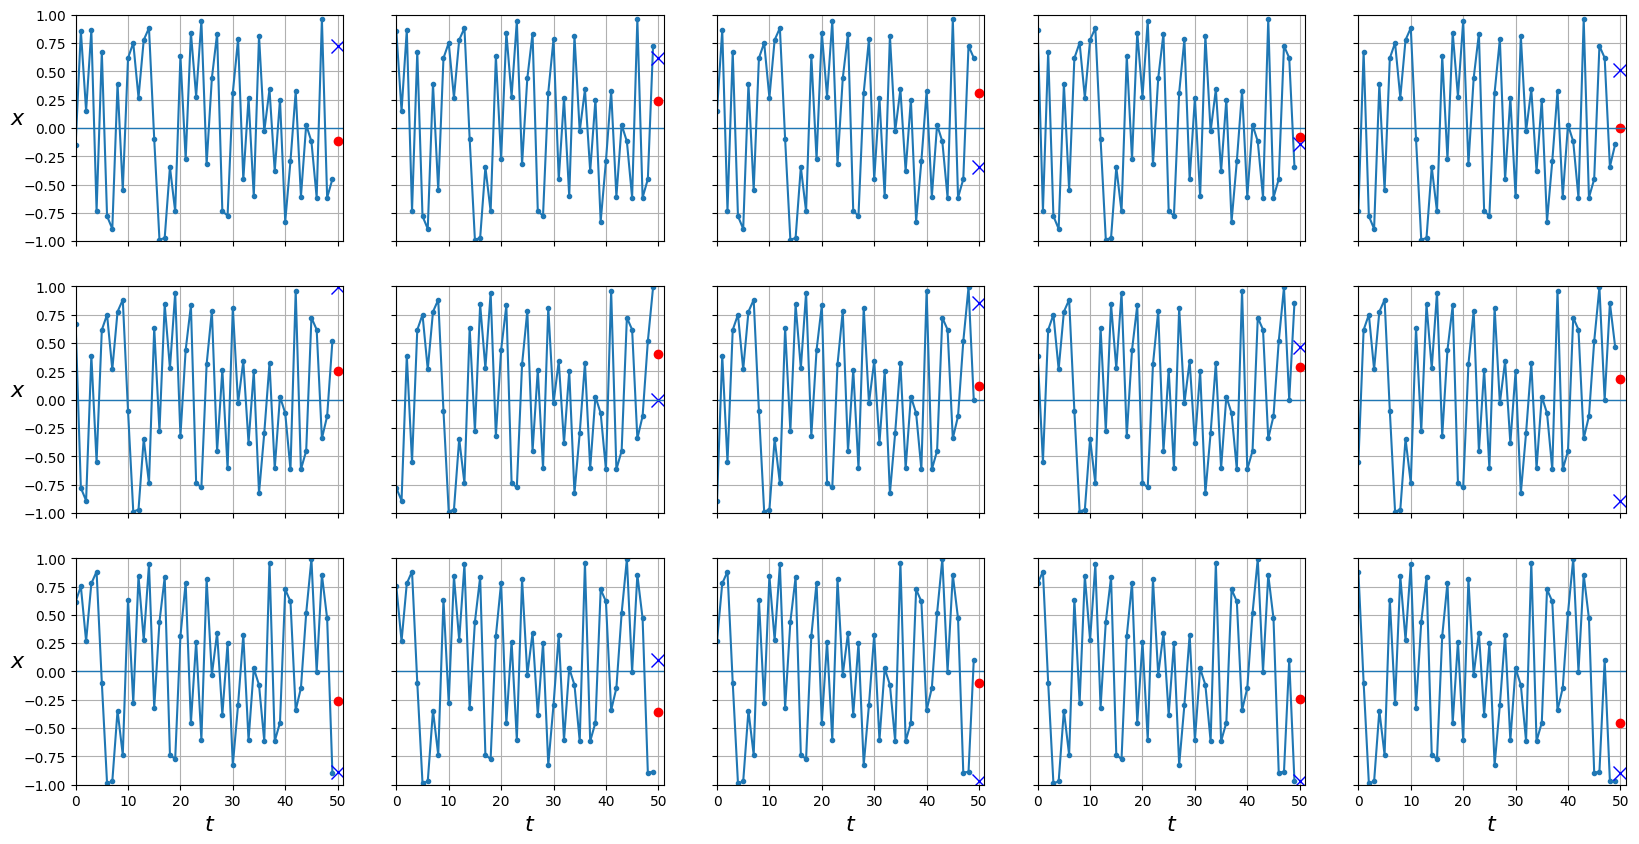

0.5470268825843472

In [33]:
y_pred = predict(rnn, dataloader['test'])
plot_series(X_test, y_test, y_pred.cpu().numpy())
mean_squared_error(y_test, y_pred.cpu())